## 회사의 데이터 직군의 연봉 데이터

### 데이터 클랜징

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/content/data_scientist_wage_data_set.csv')

In [3]:
# 모든 행을 출력
pd.set_option('display.max_columns', None)

In [4]:
train.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


* 이 데이터 셋의 Age : 회사의 설립과 관련
* JOB Title은 Unique개수가 너무 많아서 job_title_sim 컬럼을 사용
* Salary Estimate은 범위로 나와있기 때문에 Avg Salary(K)로 금액 비교
* 직장의 위치 : Job Location 컬럼 사용

* 사용할 컬럼 : Rating, size ,Type of owership, Industry - Sector, Avg Salary(K), Job Location,	Python ~ 	google_an, job_title_sim 

In [5]:
train = train.drop(['index', 'Job Title','Salary Estimate','Job Description','Company Name', 'Location',	'Headquarters', 'Founded', 'Revenue', 'Competitors','Hourly',	'Employer provided',	'Lower Salary',	'Upper Salary','Age','company_txt','seniority_by_title', 'Degree'], axis = 1)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             742 non-null    float64
 1   Size               742 non-null    object 
 2   Type of ownership  742 non-null    object 
 3   Industry           742 non-null    object 
 4   Sector             742 non-null    object 
 5   Avg Salary(K)      742 non-null    float64
 6   Job Location       742 non-null    object 
 7   Python             742 non-null    int64  
 8   spark              742 non-null    int64  
 9   aws                742 non-null    int64  
 10  excel              742 non-null    int64  
 11  sql                742 non-null    int64  
 12  sas                742 non-null    int64  
 13  keras              742 non-null    int64  
 14  pytorch            742 non-null    int64  
 15  scikit             742 non-null    int64  
 16  tensor             742 non

In [7]:
train.describe()

,Rating,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,101.484501,0.528302,0.225067,0.237197,0.522911,0.512129,0.088949,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,0.801210,37.482449,0.499535,0.417908,0.425651,0.499812,0.500190,0.284862,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,-1.000000,15.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,73.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,97.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,122.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,254.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Rating : 최솟값 "-1" 확인

In [ ]:
train.describe(include = 'O')

,Size,Type of ownership,Industry,Sector,Job Location,job_title_sim
count,742,742,742,742,742,742
unique,8,9,60,25,37,10
top,1001 - 5000,Company - Private,Biotech & Pharmaceuticals,Information Technology,CA,data scientist
freq,150,410,112,180,152,313


In [ ]:
train[train['Rating'] < 0]

,Rating,Size,Type of ownership,Industry,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
176,-1.0,51 - 200,Company - Private,IT Services,Information Technology,225.0,CA,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,data scientist
266,-1.0,51 - 200,Company - Private,IT Services,Information Technology,225.0,CA,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,data scientist
300,-1.0,201 - 500,Nonprofit Organization,-1,-1,87.5,CA,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,na
370,-1.0,unknown,Company - Private,-1,-1,120.0,MA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
404,-1.0,unknown,Company - Private,-1,-1,120.0,MA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
456,-1.0,unknown,Company - Private,-1,-1,110.5,NY,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,data scientist
551,-1.0,unknown,Company - Private,-1,-1,120.0,MA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
581,-1.0,unknown,Other Organization,-1,-1,117.5,MA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
609,-1.0,unknown,Company - Private,-1,-1,120.0,MA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
641,-1.0,unknown,Company - Private,-1,-1,132.5,MA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist


> Rating : 0보다 작은 값 삭제

In [ ]:
train = train[train['Rating'] > 0]

In [ ]:
train['job_title_sim'].value_counts()

data scientist                    310
other scientist                   136
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                  9
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

> job_title_sim : na 삭제

In [ ]:
train[train['job_title_sim'] == 'na']

,Rating,Size,Type of ownership,Industry,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
89,4.5,51 - 200,Company - Private,IT Services,Information Technology,48.0,AL,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,na
191,4.0,51 - 200,Company - Private,Computer Hardware & Software,Information Technology,93.5,MD,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,na
316,4.0,51 - 200,Company - Private,Computer Hardware & Software,Information Technology,93.5,MD,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,na
374,3.6,5001 - 10000,Company - Private,Insurance Carriers,Insurance,129.5,MA,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,na
388,4.7,1001 - 5000,Company - Private,Lending,Finance,70.5,MO,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,na
441,4.0,51 - 200,Company - Private,Computer Hardware & Software,Information Technology,93.5,MD,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,na
561,3.6,5001 - 10000,Company - Private,Insurance Carriers,Insurance,129.5,MA,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,na
586,4.7,1001 - 5000,Company - Private,Lending,Finance,70.5,MO,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,na
643,3.5,10000+,Company - Public,Computer Hardware & Software,Information Technology,98.5,CA,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,na


In [ ]:
train = train[train['job_title_sim'] != 'na']

In [ ]:
train['Job Location'].value_counts()

CA    148
MA     94
NY     71
VA     41
IL     40
PA     33
MD     32
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
AL      7
MO      7
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: Job Location, dtype: int64

In [ ]:
train['Sector'].value_counts()

Information Technology                173
Biotech & Pharmaceuticals             112
Business Services                      97
Insurance                              67
Health Care                            49
Finance                                40
Manufacturing                          34
Aerospace & Defense                    25
Education                              23
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
Non-Profit                              9
Real Estate                             8
Transportation & Logistics              8
Travel & Tourism                        8
Telecommunications                      6
Media                                   6
Arts, Entertainment & Recreation        4
Consumer Services                       4
Mining & Metals                         3
Construction, Repair & Maintenance      3
Agriculture & Forestry                  1
-1                                

In [ ]:
train = train[train['Sector'] != '-1']

> Sector : -1 삭제

In [ ]:
train['Size'].value_counts()

1001 - 5000      148
501 - 1000       134
10000+           129
201 - 500        116
51 - 200          88
5001 - 10000      74
1 - 50            30
unknown            2
Name: Size, dtype: int64

In [ ]:
train = train[train['Size'] != 'unknown']

> Size : unknown 삭제

In [ ]:
train['job_title_sim'].value_counts()

data scientist                    308
other scientist                   136
data engineer                     118
analyst                           101
machine learning engineer          22
Data scientist project manager     16
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

> Data Analyst : analyst, data analitics

> data modeler, director 삭제

In [ ]:
def Job_cleaning(a):
  if a == 'analyst' or a == 'data analitics':
    return 'Data Analyst'
  else :
    return a

In [ ]:
train['Job'] = train['job_title_sim'].apply(Job_cleaning)

In [ ]:
train.Job.value_counts()

data scientist                    308
other scientist                   136
data engineer                     118
Data Analyst                      109
machine learning engineer          22
Data scientist project manager     16
data modeler                        5
director                            5
Name: Job, dtype: int64

In [ ]:
train = train[train['Job'] != 'director']
train = train[train['Job'] != 'data modeler']

In [ ]:
train['Job'].value_counts()

data scientist                    308
other scientist                   136
data engineer                     118
Data Analyst                      109
machine learning engineer          22
Data scientist project manager     16
Name: Job, dtype: int64

In [ ]:
train = train.drop(['job_title_sim'], axis = 1)

In [ ]:
# 직군을 컬럼 제일 처음으로 변경
col1=train.columns[-1:].to_list()
col2=train.columns[:-1].to_list()
new_col=col1+col2
train=train[new_col]
train.head() 

,Job,Rating,Size,Type of ownership,Industry,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,data scientist,3.8,501 - 1000,Company - Private,Aerospace & Defense,Aerospace & Defense,72.0,NM,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,data scientist,3.4,10000+,Other Organization,Health Care Services & Hospitals,Health Care,87.5,MD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,data scientist,4.8,501 - 1000,Company - Private,Security Services,Business Services,85.0,FL,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,data scientist,3.8,1001 - 5000,Government,Energy,"Oil, Gas, Energy & Utilities",76.5,WA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,data scientist,2.9,51 - 200,Company - Private,Advertising & Marketing,Business Services,114.5,NY,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


### 1. Data Scientist 분석

In [ ]:
Data_Scientist = train[train['Job'] == 'data scientist']

In [ ]:
Data_Scientist.head()

,Job,Rating,Size,Type of ownership,Industry,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,data scientist,3.8,501 - 1000,Company - Private,Aerospace & Defense,Aerospace & Defense,72.0,NM,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,data scientist,3.4,10000+,Other Organization,Health Care Services & Hospitals,Health Care,87.5,MD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,data scientist,4.8,501 - 1000,Company - Private,Security Services,Business Services,85.0,FL,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,data scientist,3.8,1001 - 5000,Government,Energy,"Oil, Gas, Energy & Utilities",76.5,WA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,data scientist,2.9,51 - 200,Company - Private,Advertising & Marketing,Business Services,114.5,NY,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
Data_Scientist_Skill = Data_Scientist.groupby('Job').mean()
Data_Scientist_Skill

,Rating,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Job,,,,,,,,,,,,,,,,,,
data scientist,3.788961,117.387987,0.769481,0.272727,0.243506,0.49026,0.568182,0.162338,0.094156,0.107143,0.152597,0.191558,0.194805,0.24026,0.090909,0.012987,0.061688,0.00974


In [ ]:
Data_Scientist_Skill.columns

Index(['Rating', 'Avg Salary(K)', 'Python', 'spark', 'aws', 'excel', 'sql',
       'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau',
       'bi', 'flink', 'mongo', 'google_an'],
      dtype='object')

In [ ]:
# 행 열 변경
Data_Scientist_Skill = pd.melt(Data_Scientist_Skill, id_vars=['Rating','Avg Salary(K)'], value_vars = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 
                                                                                                       'pytorch','scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo','google_an'], value_name= 'skill_ratio')

In [ ]:
Data_Scientist_Skill = Data_Scientist_Skill.drop(['Rating','Avg Salary(K)'], axis = 1)
Data_Scientist_Skill

,variable,skill_ratio
0,Python,0.769481
1,spark,0.272727
2,aws,0.243506
3,excel,0.490260
4,sql,0.568182
5,sas,0.162338
6,keras,0.094156
7,pytorch,0.107143
8,scikit,0.152597
9,tensor,0.191558


In [ ]:
# 상위 20%의 급여 : 143.3
Data_Scientist['Avg Salary(K)'].quantile(0.80)

143.3

In [ ]:
Data_Scientist_20 = Data_Scientist[Data_Scientist['Avg Salary(K)'] > 143.3]

In [ ]:
Data_Scientist_20.head()

,Job,Rating,Size,Type of ownership,Industry,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
10,data scientist,3.5,501 - 1000,Company - Private,Other Retail Stores,Retail,163.5,CA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,data scientist,4.3,201 - 500,Company - Private,Enterprise Software & Network Solutions,Information Technology,153.5,CA,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0
38,data scientist,3.5,5001 - 10000,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,147.5,CA,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
46,data scientist,3.7,10000+,Company - Public,IT Services,Information Technology,184.5,WA,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0
56,data scientist,4.1,501 - 1000,Company - Private,Enterprise Software & Network Solutions,Information Technology,154.5,CA,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
Data_Scientist_Skill_20 = Data_Scientist_20.groupby('Job').mean()
Data_Scientist_Skill_20

,Rating,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Job,,,,,,,,,,,,,,,,,,
data scientist,3.803226,168.701613,0.83871,0.33871,0.322581,0.564516,0.5,0.241935,0.112903,0.048387,0.193548,0.177419,0.290323,0.145161,0.064516,0.032258,0.032258,0.0


In [ ]:
# 행 열 변경
Data_Scientist_Skill_20 = pd.melt(Data_Scientist_Skill_20, id_vars=['Rating','Avg Salary(K)'], value_vars = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 
                                                                                                       'pytorch','scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo','google_an'], value_name= 'skill_ratio')

In [ ]:
Data_Scientist_Skill_20 = Data_Scientist_Skill_20.drop(['Rating','Avg Salary(K)'], axis = 1)
Data_Scientist_Skill_20

,variable,skill_ratio
0,Python,0.838710
1,spark,0.338710
2,aws,0.322581
3,excel,0.564516
4,sql,0.500000
5,sas,0.241935
6,keras,0.112903
7,pytorch,0.048387
8,scikit,0.193548
9,tensor,0.177419


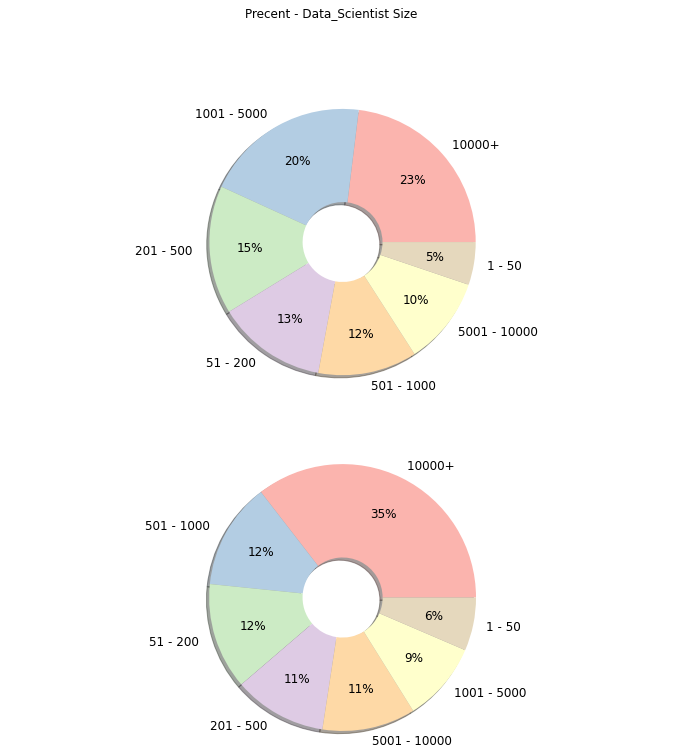

In [ ]:
# Data scientist 직업 회사 규모 분포 
def custom_autopct(pct):
  return ('%d%%' % pct) if pct > 2 else '' # 2프로 이상인 컬럼만 표시
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Scientist Size")

ax1.pie(Data_Scientist['Size'].value_counts().values,
        labels=Data_Scientist['Size'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Scientist['Size'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Scientist_20['Size'].value_counts().values,
        labels=Data_Scientist_20['Size'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Scientist_20['Size'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data scientist 직업 회사 규모 분포 
  * 전체 : 10000명 이상, 1001명 ~ 5000명, 201명 ~ 500명 순
  * 상위 20% : 10000명 이상, 501명 ~ 1000명, 51명 ~ 200명 순


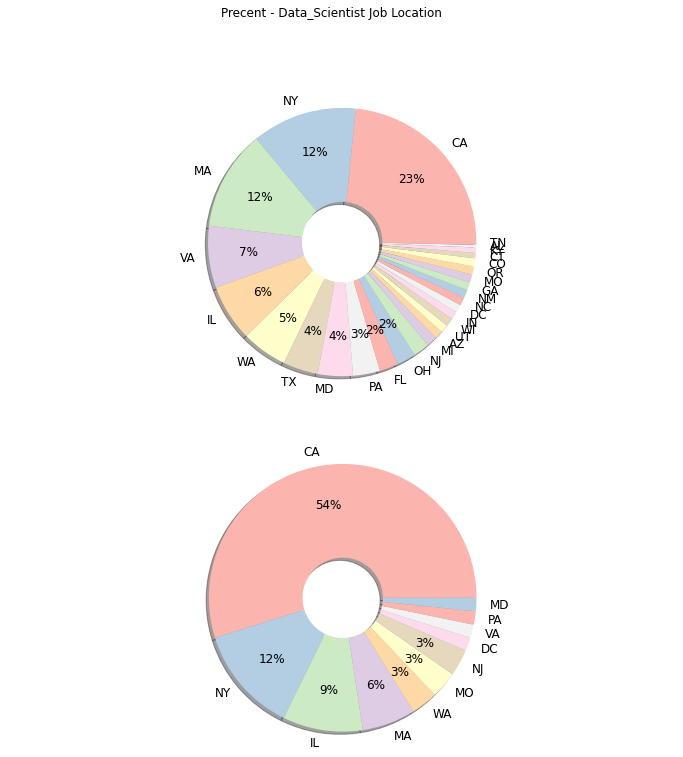

In [ ]:
# Data scientist 직업 지역 분포 
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Scientist Job Location")

ax1.pie(Data_Scientist['Job Location'].value_counts().values,
        labels=Data_Scientist['Job Location'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Scientist['Job Location'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Scientist_20['Job Location'].value_counts().values,
        labels=Data_Scientist_20['Job Location'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Scientist_20['Job Location'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data scientist 직업 지역 분포 
  * 전체 : CA, NY, MA
  * 상위 20% : CA, NY, IL

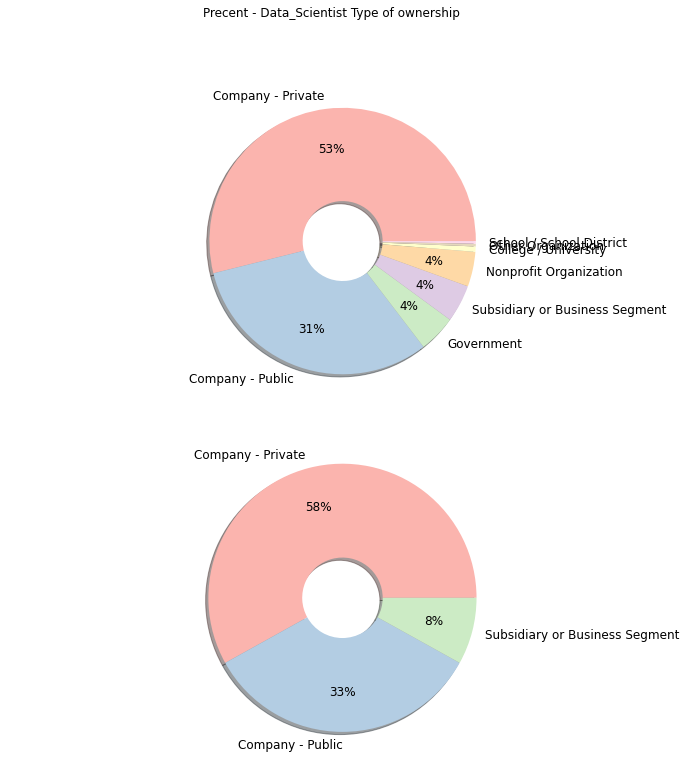

In [ ]:
# Data_Scientist 직업 기업 종류 분포
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Scientist Type of ownership")

ax1.pie(Data_Scientist['Type of ownership'].value_counts().values,
        labels=Data_Scientist['Type of ownership'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Scientist['Type of ownership'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Scientist_20['Type of ownership'].value_counts().values,
        labels=Data_Scientist_20['Type of ownership'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Scientist_20['Type of ownership'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

*  Data Scientist 직업 기업 종류 분포
  * 전체 : 사기업, 공기업, 정부
  * 상위 20% : 사기업, 공기업, 자회사

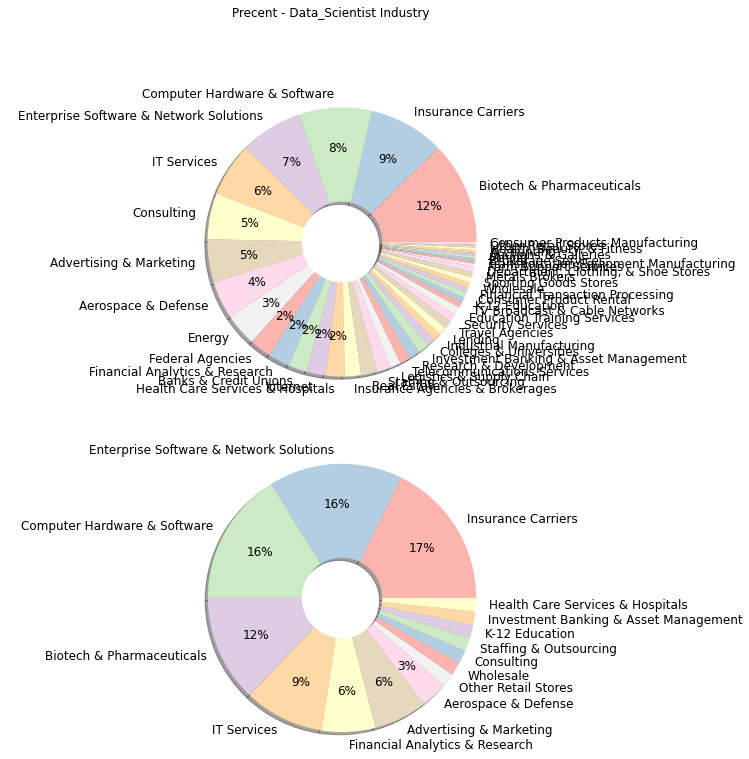

In [ ]:
# Data_Scientist 직업 회사 분야 분포
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Scientist Industry")

ax1.pie(Data_Scientist['Industry'].value_counts().values,
        labels=Data_Scientist['Industry'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Scientist['Industry'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Scientist_20['Industry'].value_counts().values,
        labels=Data_Scientist_20['Industry'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Scientist_20['Industry'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data Scientist 직업 회사 분야 분포
  * 전체 : 제약-바이오, 보험, 컴퓨터 하드웨어 - 소프트웨어
  * 상위 20% : 보험, 소프트웨어 - 네트워크 솔루션 기업, 컴퓨터 하드웨어 - 소프트웨어

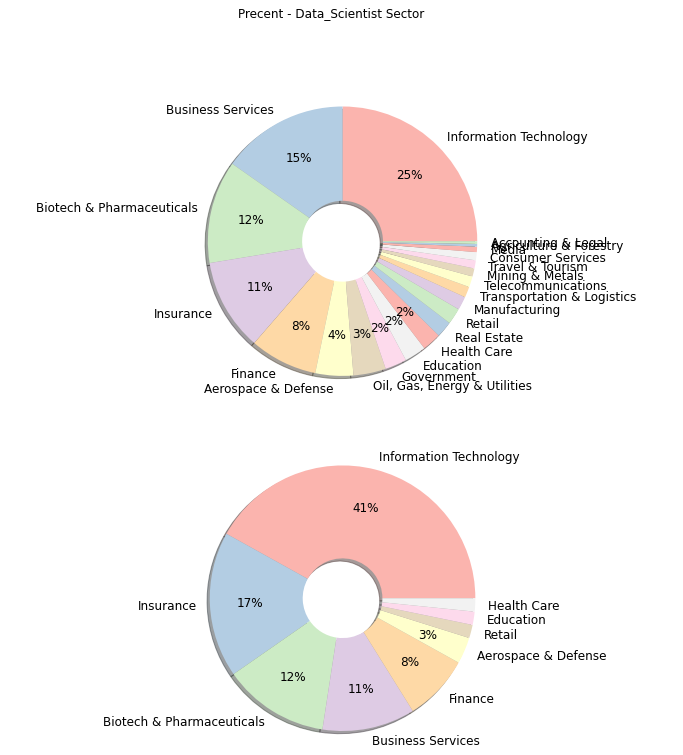

In [ ]:
# Data_Scientist 직업 산업군 분포
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Scientist Sector")

ax1.pie(Data_Scientist['Sector'].value_counts().values,
        labels=Data_Scientist['Sector'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Scientist['Sector'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Scientist_20['Sector'].value_counts().values,
        labels=Data_Scientist_20['Sector'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Scientist_20['Sector'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data Scientist 직업 산업군 분포
  * 전체 : 정보통신, 사업 서비스, 제약 - 바이오
  * 상위 20% : 정보통신, 보험, 제약 - 바이오

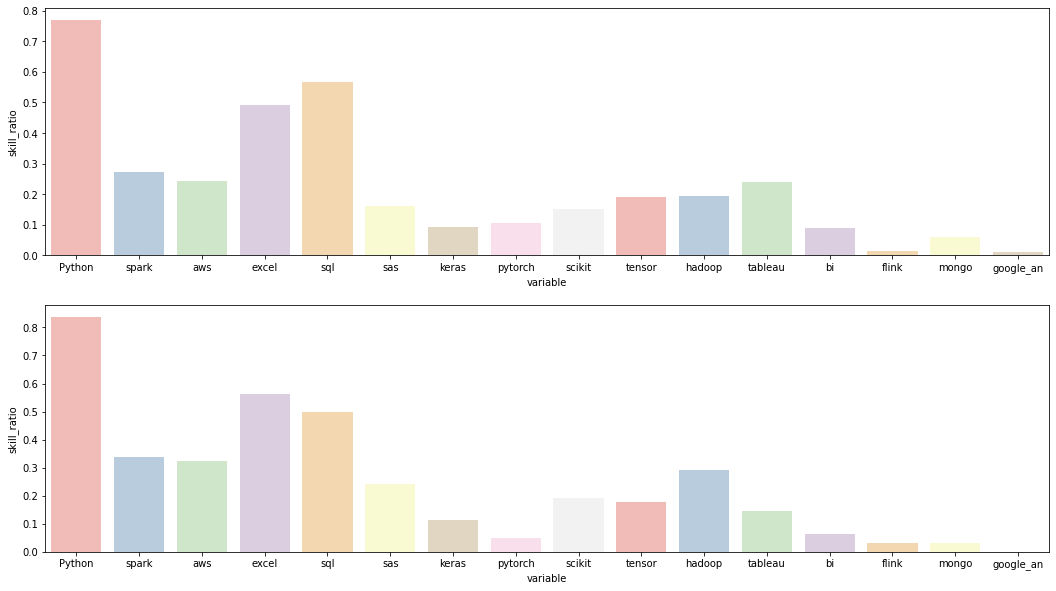

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 10)

# Data scientist Skill
sns.barplot(x= 'variable', y= 'skill_ratio', data = Data_Scientist_Skill, estimator = np.mean, palette = 'Pastel1', ax = ax1) 
# 상위 20% Data scientist Skill 
sns.barplot(x= 'variable', y= 'skill_ratio', data = Data_Scientist_Skill_20, estimator = np.mean, palette = 'Pastel1', ax = ax2) 

* Data Scientist 보유 기술
  * 전체 : PYTHON, SQL, EXCEL
  * 상위 20% : PYTHON, EXCEL, SQL

### 2. Other Scientist 분석

In [ ]:
Other_Scientist = train[train['Job'] == 'other scientist']

In [ ]:
Other_Scientist.head()

,Job,Rating,Size,Type of ownership,Industry,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
8,other scientist,3.3,10000+,Hospital,Health Care Services & Hospitals,Health Care,61.0,NY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,other scientist,3.9,51 - 200,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,102.0,MA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
43,other scientist,3.4,5001 - 10000,Company - Public,Consumer Products Manufacturing,Manufacturing,82.5,NJ,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
48,other scientist,4.7,501 - 1000,Company - Private,Aerospace & Defense,Aerospace & Defense,86.5,OH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69,other scientist,4.0,10000+,Company - Public,Computer Hardware & Software,Information Technology,97.5,WA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Other_Scientist_Skill = Other_Scientist.groupby('Job').mean()
Other_Scientist_Skill

,Rating,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Job,,,,,,,,,,,,,,,,,,
other scientist,3.385294,86.338235,0.080882,0.0,0.102941,0.448529,0.022059,0.014706,0.0,0.007353,0.0,0.007353,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Other_Scientist.columns

Index(['Job', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Avg Salary(K)', 'Job Location', 'Python', 'spark', 'aws', 'excel',
       'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop',
       'tableau', 'bi', 'flink', 'mongo', 'google_an'],
      dtype='object')

In [ ]:
# 행 열 변경
Other_Scientist_Skill = pd.melt(Other_Scientist_Skill, id_vars=['Rating','Avg Salary(K)'], value_vars = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 
                                                                                                       'pytorch','scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo','google_an'], value_name= 'skill_ratio')

In [ ]:
Other_Scientist_Skill = Other_Scientist_Skill.drop(['Rating','Avg Salary(K)'], axis = 1)
Other_Scientist_Skill

,variable,skill_ratio
0,Python,0.080882
1,spark,0.000000
2,aws,0.102941
3,excel,0.448529
4,sql,0.022059
5,sas,0.014706
6,keras,0.000000
7,pytorch,0.007353
8,scikit,0.000000
9,tensor,0.007353


In [ ]:
# 상위 20%의 급여 : 86.3
Other_Scientist['Avg Salary(K)'].quantile(0.80)

111.5

In [ ]:
Other_Scientist_20 = Other_Scientist[Other_Scientist['Avg Salary(K)'] > 86.3]

In [ ]:
Other_Scientist_20.head()

,Job,Rating,Size,Type of ownership,Industry,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
16,other scientist,3.9,51 - 200,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,102.0,MA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
48,other scientist,4.7,501 - 1000,Company - Private,Aerospace & Defense,Aerospace & Defense,86.5,OH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69,other scientist,4.0,10000+,Company - Public,Computer Hardware & Software,Information Technology,97.5,WA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77,other scientist,1.9,51 - 200,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,87.5,MA,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
91,other scientist,3.5,201 - 500,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,174.0,CA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Other_Scientist_Skill_20 = Other_Scientist_20.groupby('Job').mean()
Other_Scientist_Skill_20

,Rating,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Job,,,,,,,,,,,,,,,,,,
other scientist,3.490385,118.615385,0.173077,0.0,0.096154,0.557692,0.019231,0.038462,0.0,0.019231,0.0,0.019231,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 행 열 변경
Other_Scientist_Skill_20 = pd.melt(Other_Scientist_Skill_20, id_vars=['Rating','Avg Salary(K)'], value_vars = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 
                                                                                                       'pytorch','scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo','google_an'], value_name= 'skill_ratio')

In [ ]:
Other_Scientist_Skill_20 = Other_Scientist_Skill_20.drop(['Rating','Avg Salary(K)'], axis = 1)
Other_Scientist_Skill_20

,variable,skill_ratio
0,Python,0.173077
1,spark,0.000000
2,aws,0.096154
3,excel,0.557692
4,sql,0.019231
5,sas,0.038462
6,keras,0.000000
7,pytorch,0.019231
8,scikit,0.000000
9,tensor,0.019231


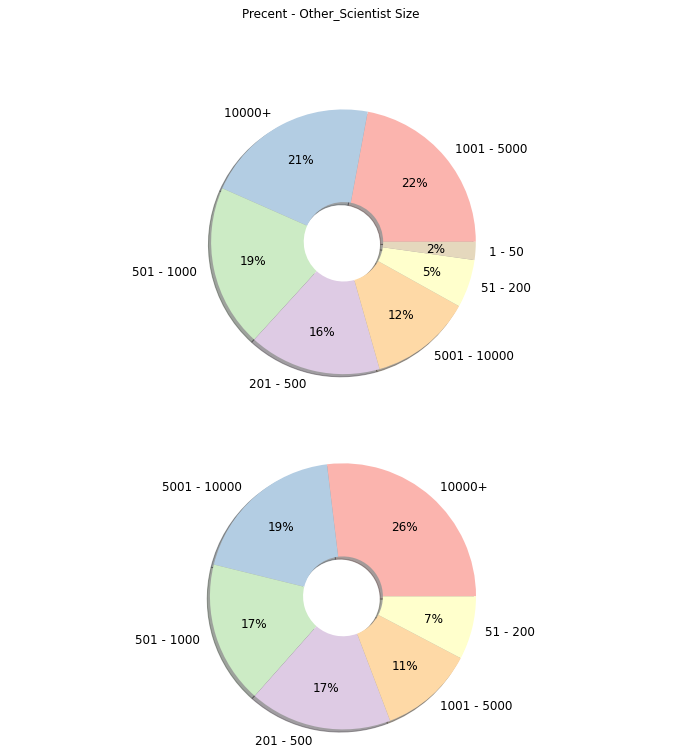

In [ ]:
# Other_Scientist 직업 회사 규모 분포 
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Other_Scientist Size")

ax1.pie(Other_Scientist['Size'].value_counts().values,
        labels=Other_Scientist['Size'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Other_Scientist['Size'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Other_Scientist_20['Size'].value_counts().values,
        labels=Other_Scientist_20['Size'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Other_Scientist_20['Size'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Other Scientist 직업 회사 규모 분포 
  * 전체 : 1001명 ~ 5000명, 10000명 이상, 501명 ~ 1000명
  * 상위 20% : 10000명 이상, 5001명 ~ 10000명, 501명 ~ 1000명 / 201명 ~ 500명

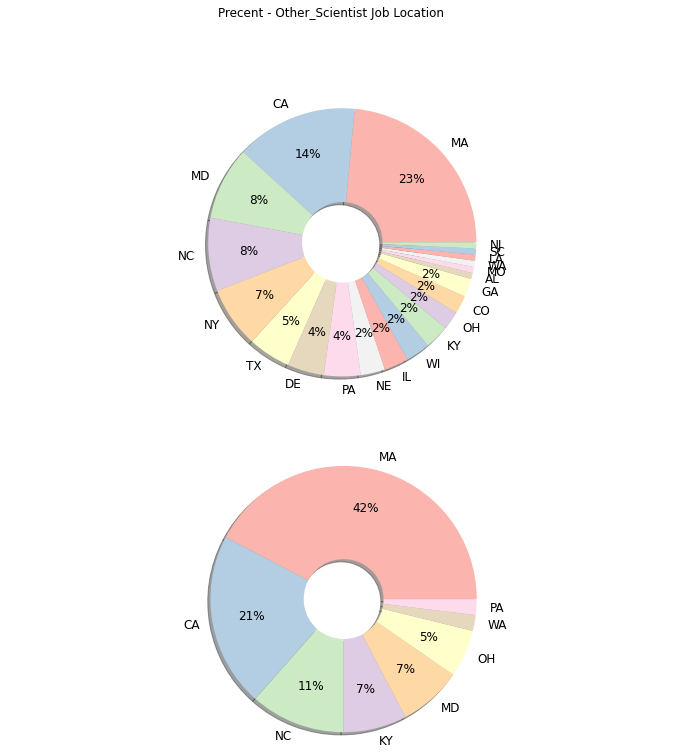

In [ ]:
# Other_Scientist 직업 지역 분포 
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Other_Scientist Job Location")

ax1.pie(Other_Scientist['Job Location'].value_counts().values,
        labels=Other_Scientist['Job Location'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Other_Scientist['Job Location'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Other_Scientist_20['Job Location'].value_counts().values,
        labels=Other_Scientist_20['Job Location'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Other_Scientist_20['Job Location'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Other Scientist 직업 지역 분포
  * 전체 : MA, CA, MD
  * 상위 20% : MA, CA, NC

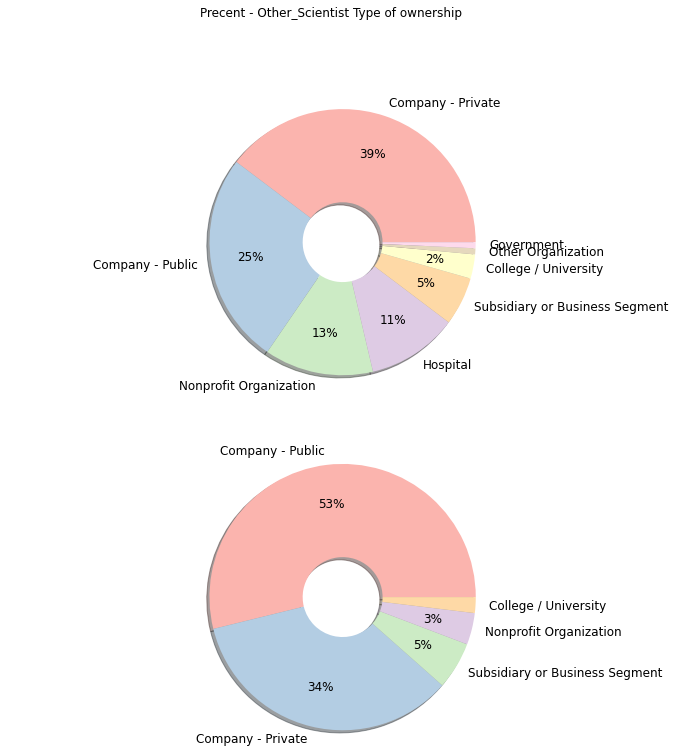

In [ ]:
# Other_Scientist 직업 기업 종류 분포
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Other_Scientist Type of ownership")

ax1.pie(Other_Scientist['Type of ownership'].value_counts().values,
        labels=Other_Scientist['Type of ownership'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Other_Scientist['Type of ownership'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Other_Scientist_20['Type of ownership'].value_counts().values,
        labels=Other_Scientist_20['Type of ownership'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Other_Scientist_20['Type of ownership'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Other Scientist 직업 기업 종류 분포
  * 전체 : 사기업, 공기업, 비영리 단체
  * 상위 20% : 공기업, 사기업, 자회사

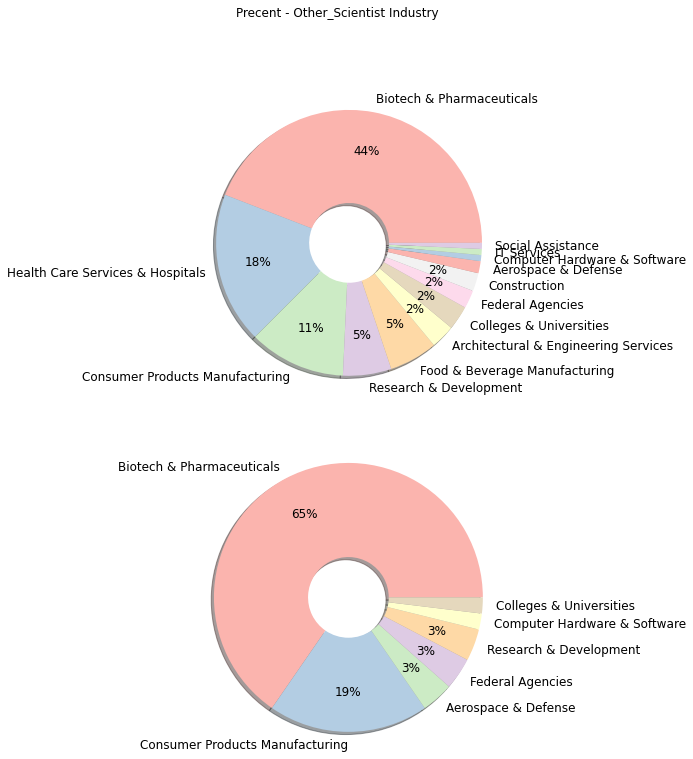

In [ ]:
# Other_Scientist 직업 회사 분야 분포
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Other_Scientist Industry")

ax1.pie(Other_Scientist['Industry'].value_counts().values,
        labels=Other_Scientist['Industry'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Other_Scientist['Industry'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Other_Scientist_20['Industry'].value_counts().values,
        labels=Other_Scientist_20['Industry'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Other_Scientist_20['Industry'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Other Scientist 직업 회사 분야 분포
  * 전체 : 제약 - 바이오, 병원 - 헬스케어, 소비자 물품 제조업체
  * 상위 20% : 제약 - 바이오, 소비자 물품 제조업체

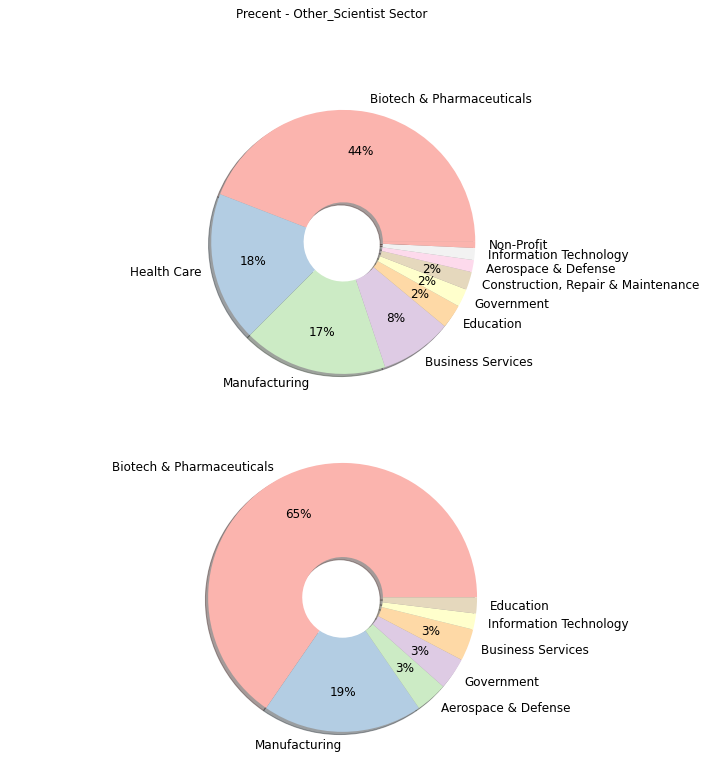

In [ ]:
# Other_Scientist 직업 산업군 분포
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Other_Scientist Sector")

ax1.pie(Other_Scientist['Sector'].value_counts().values,
        labels=Other_Scientist['Sector'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Other_Scientist['Sector'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Other_Scientist_20['Sector'].value_counts().values,
        labels=Other_Scientist_20['Sector'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Other_Scientist_20['Sector'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Other Scientist 직업 산업군 분포
  * 전체 : 제약 - 바이오, 헬스케어, 제조업
  * 상위 20% : 제약 - 바이오, 제조업

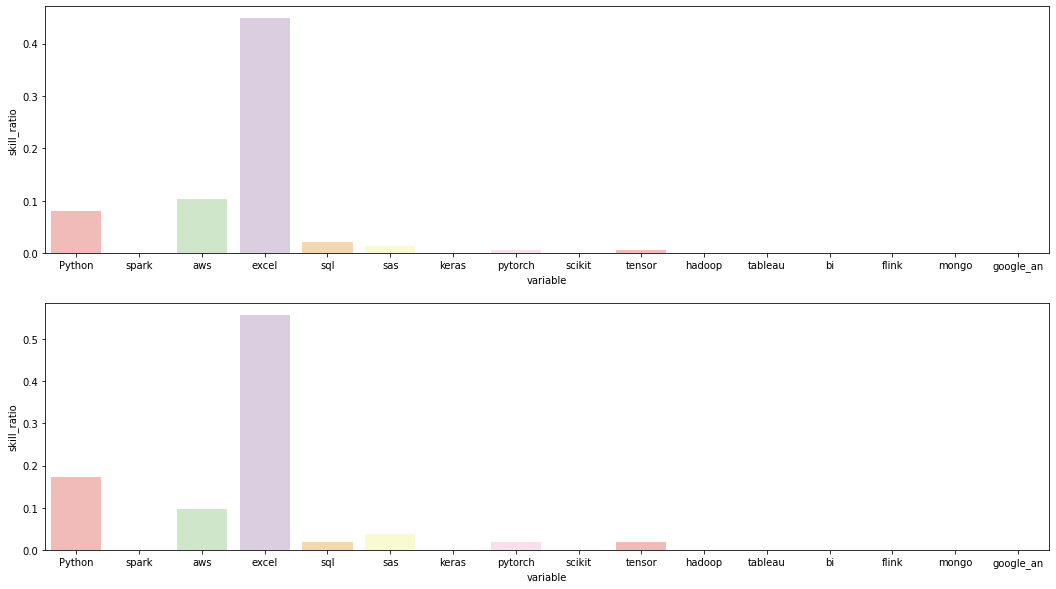

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 10)

# Other Scientist Skill
sns.barplot(x= 'variable', y= 'skill_ratio', data = Other_Scientist_Skill, estimator = np.mean, palette = 'Pastel1', ax = ax1) 
# 상위 20% Other Scientist Skill 
sns.barplot(x= 'variable', y= 'skill_ratio', data = Other_Scientist_Skill_20, estimator = np.mean, palette = 'Pastel1', ax = ax2) 

* Other Scientist 보유 기술
  * 전체 : Excel, Aws, Python
  * 상위 20% : Excel, Python, Aws

### 3. Data Engineer  분석

In [ ]:
Data_Engineer = train[train['Job'] == 'data engineer']

In [ ]:
Data_Engineer.head()

,Job,Rating,Size,Type of ownership,Industry,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
15,data engineer,3.6,1001 - 5000,Subsidiary or Business Segment,Motion Picture Production & Distribution,Media,146.0,NJ,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
39,data engineer,3.5,201 - 500,Company - Private,Insurance Carriers,Insurance,106.0,NY,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
84,data engineer,4.0,201 - 500,Company - Private,Consulting,Business Services,87.0,VA,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
104,data engineer,3.9,1001 - 5000,Company - Private,IT Services,Information Technology,95.5,NC,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
110,data engineer,3.4,201 - 500,Company - Private,Internet,Information Technology,78.0,NJ,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Data_Engineer_Skill = Data_Engineer.groupby('Job').mean()
Data_Engineer_Skill

,Rating,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Job,,,,,,,,,,,,,,,,,,
data engineer,3.789831,105.461864,0.652542,0.567797,0.5,0.449153,0.728814,0.008475,0.0,0.0,0.0,0.016949,0.423729,0.09322,0.025424,0.050847,0.110169,0.0


In [ ]:
Data_Engineer.columns

Index(['Job', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Avg Salary(K)', 'Job Location', 'Python', 'spark', 'aws', 'excel',
       'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop',
       'tableau', 'bi', 'flink', 'mongo', 'google_an'],
      dtype='object')

In [ ]:
# 행 열 변경
Data_Engineer_Skill = pd.melt(Data_Engineer_Skill, id_vars=['Rating','Avg Salary(K)'], value_vars = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 
                                                                                                       'pytorch','scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo','google_an'], value_name= 'skill_ratio')

In [ ]:
Data_Engineer_Skill = Data_Engineer_Skill.drop(['Rating','Avg Salary(K)'], axis = 1)
Data_Engineer_Skill

,variable,skill_ratio
0,Python,0.652542
1,spark,0.567797
2,aws,0.500000
3,excel,0.449153
4,sql,0.728814
5,sas,0.008475
6,keras,0.000000
7,pytorch,0.000000
8,scikit,0.000000
9,tensor,0.016949


In [ ]:
# 상위 20%의 급여 : 122.3
Data_Engineer['Avg Salary(K)'].quantile(0.80)

122.30000000000001

In [ ]:
Data_Engineer_20 = Data_Engineer[Data_Engineer['Avg Salary(K)'] > 122.3]

In [ ]:
Data_Engineer_20.head()

,Job,Rating,Size,Type of ownership,Industry,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
15,data engineer,3.6,1001 - 5000,Subsidiary or Business Segment,Motion Picture Production & Distribution,Media,146.0,NJ,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
119,data engineer,3.2,1001 - 5000,Company - Private,Advertising & Marketing,Business Services,134.0,NC,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
138,data engineer,5.0,51 - 200,Company - Private,IT Services,Information Technology,132.5,FL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
195,data engineer,4.1,51 - 200,Company - Private,Internet,Information Technology,205.0,CA,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
298,data engineer,4.0,5001 - 10000,Company - Public,Computer Hardware & Software,Information Technology,162.5,CA,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Data_Engineer_Skill_20 = Data_Engineer_20.groupby('Job').mean()
Data_Engineer_Skill_20

,Rating,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Job,,,,,,,,,,,,,,,,,,
data engineer,4.041667,152.041667,0.583333,0.75,0.708333,0.375,0.666667,0.0,0.0,0.0,0.0,0.083333,0.375,0.0,0.0,0.041667,0.291667,0.0


In [ ]:
# 행 열 변경
Data_Engineer_Skill_20 = pd.melt(Data_Engineer_Skill_20, id_vars=['Rating','Avg Salary(K)'], value_vars = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 
                                                                                                       'pytorch','scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo','google_an'], value_name= 'skill_ratio')

In [ ]:
Data_Engineer_Skill_20 = Data_Engineer_Skill_20.drop(['Rating','Avg Salary(K)'], axis = 1)
Data_Engineer_Skill_20

,variable,skill_ratio
0,Python,0.583333
1,spark,0.750000
2,aws,0.708333
3,excel,0.375000
4,sql,0.666667
5,sas,0.000000
6,keras,0.000000
7,pytorch,0.000000
8,scikit,0.000000
9,tensor,0.083333


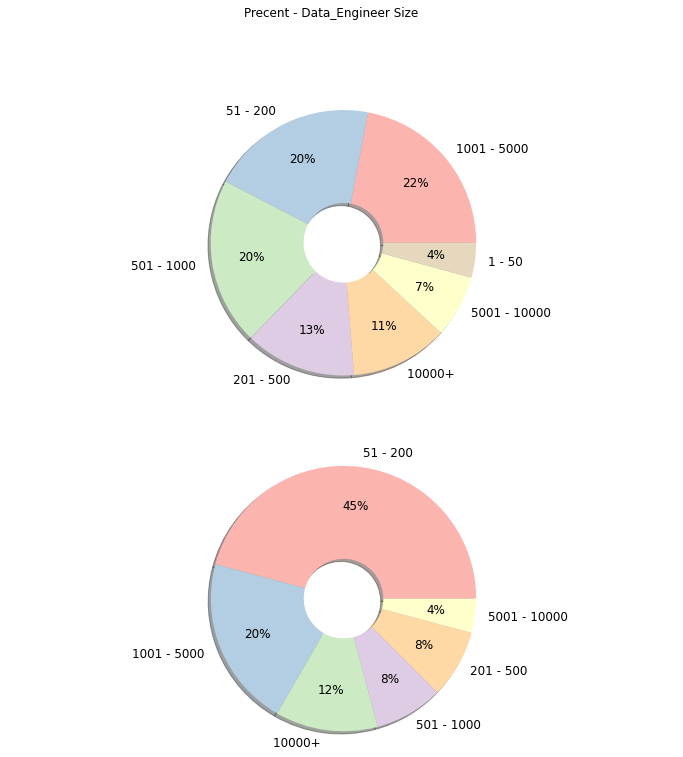

In [ ]:
# Data_Engineer 직업 회사 규모 분포 
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Engineer Size")

ax1.pie(Data_Engineer['Size'].value_counts().values,
        labels=Data_Engineer['Size'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Engineer['Size'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Engineer_20['Size'].value_counts().values,
        labels=Data_Engineer_20['Size'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Engineer_20['Size'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data Engineer 직업 회사 규모 분포 
  * 전체 : 1001명 ~ 5000명, 51명 ~ 200명, 501명 ~ 1000명
  * 상위 20% : 51명 ~ 200명, 1001명 ~ 5000명, 10000명 이상

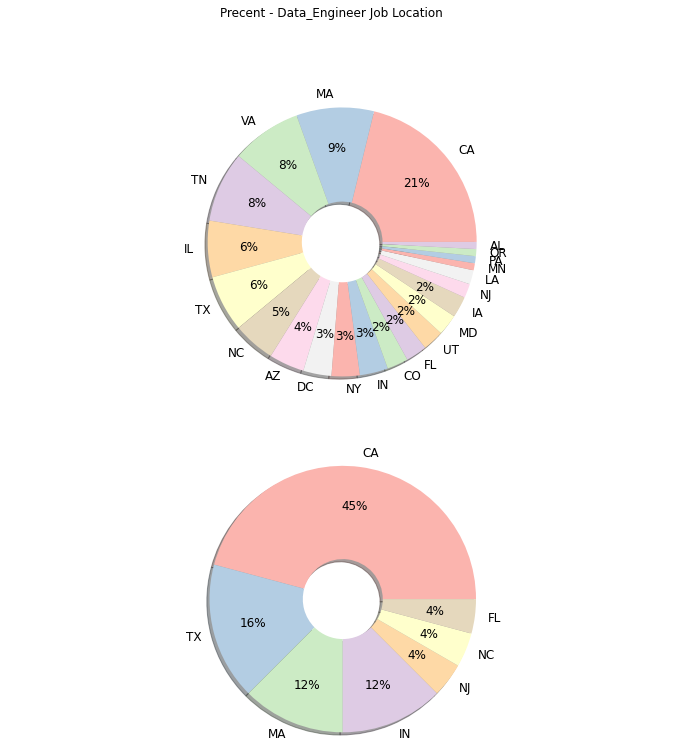

In [ ]:
# Data_Engineer 직업 지역 분포 
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Engineer Job Location")

ax1.pie(Data_Engineer['Job Location'].value_counts().values,
        labels=Data_Engineer['Job Location'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Engineer['Job Location'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Engineer_20['Job Location'].value_counts().values,
        labels=Data_Engineer_20['Job Location'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Engineer_20['Job Location'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data Engineer 직업 지역 분포
  * 전체 : CA, MA, VA, TN
  * 상위 20% : CA, TX, MA, IN

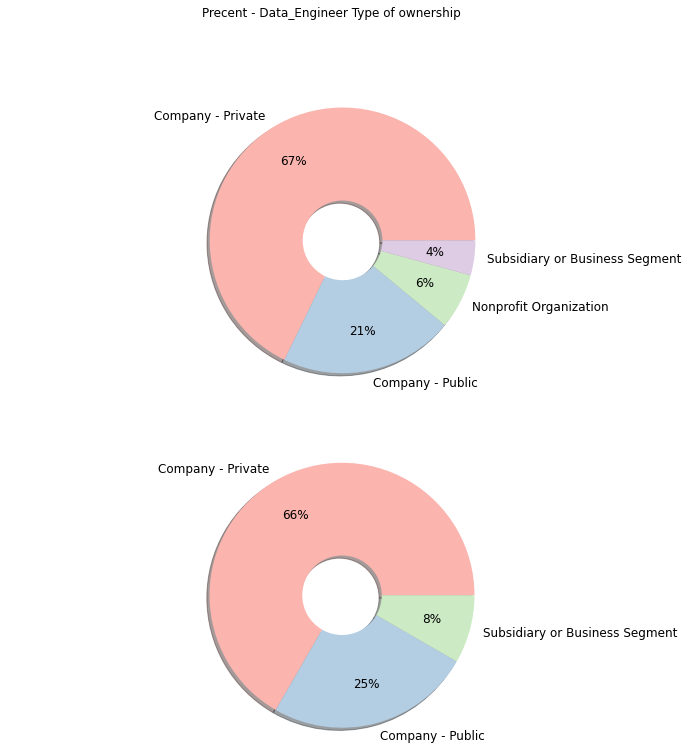

In [ ]:
# Data_Engineer 직업 기업 종류 분포
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Engineer Type of ownership")

ax1.pie(Data_Engineer['Type of ownership'].value_counts().values,
        labels=Data_Engineer['Type of ownership'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Engineer['Type of ownership'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Engineer_20['Type of ownership'].value_counts().values,
        labels=Data_Engineer_20['Type of ownership'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Engineer_20['Type of ownership'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data Engineer 직업 기업 종류 분포
  * 전체 : 사기업, 공기업, 비영리 단체
  * 상위 20% : 사기업, 공기업, 자회사

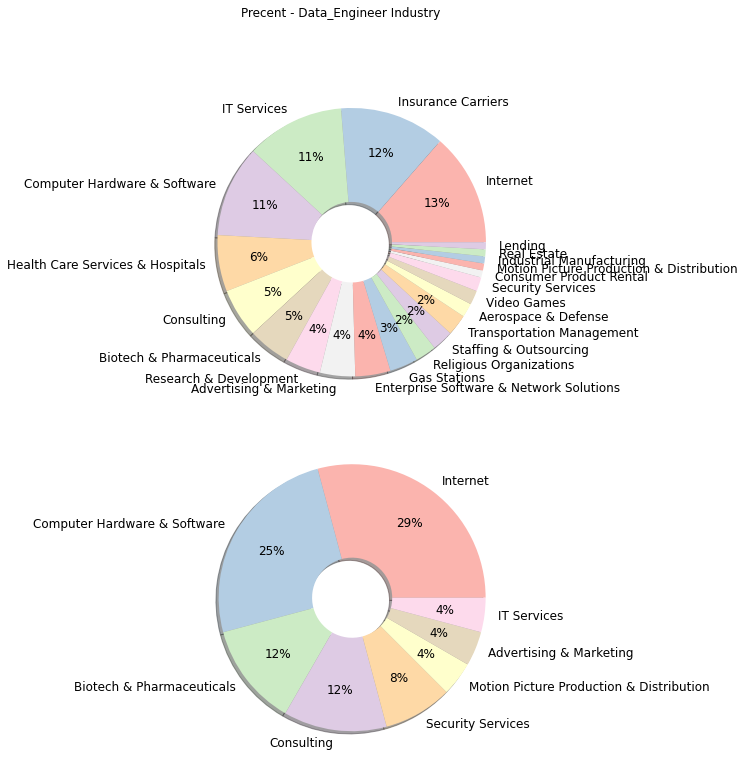

In [ ]:
# Data_Engineer 직업 회사 분야 분포
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Engineer Industry")

ax1.pie(Data_Engineer['Industry'].value_counts().values,
        labels=Data_Engineer['Industry'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Engineer['Industry'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Engineer_20['Industry'].value_counts().values,
        labels=Data_Engineer_20['Industry'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Engineer_20['Industry'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data Engineer 직업 회사 분야 분포
  * 전체 : 인터넷, 보험회사, IT 서비스
  * 상위 20% : 인터넷, 컴퓨터 하드웨어 - 소프트웨어, 제약 - 바이오, 컨설팅

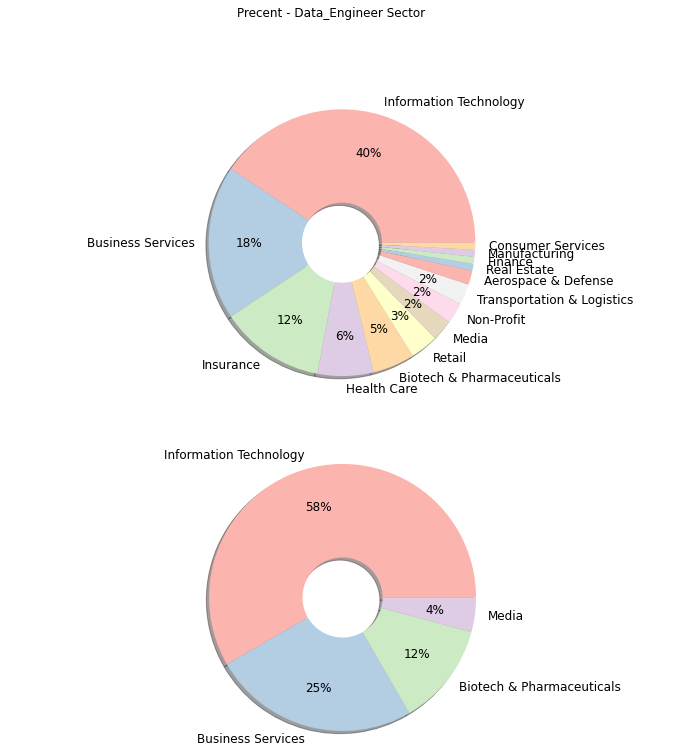

In [ ]:
# Data_Engineer 직업 산업군 분포
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Engineer Sector")

ax1.pie(Data_Engineer['Sector'].value_counts().values,
        labels=Data_Engineer['Sector'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Engineer['Sector'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Engineer_20['Sector'].value_counts().values,
        labels=Data_Engineer_20['Sector'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Engineer_20['Sector'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data Engineer 직업 산업군 분포
  * 전체 : 정보기술, 비즈니스 서비스, 보험
  * 상위 20% : 정보기술, 비즈니스 서비스, 제약 - 바이오

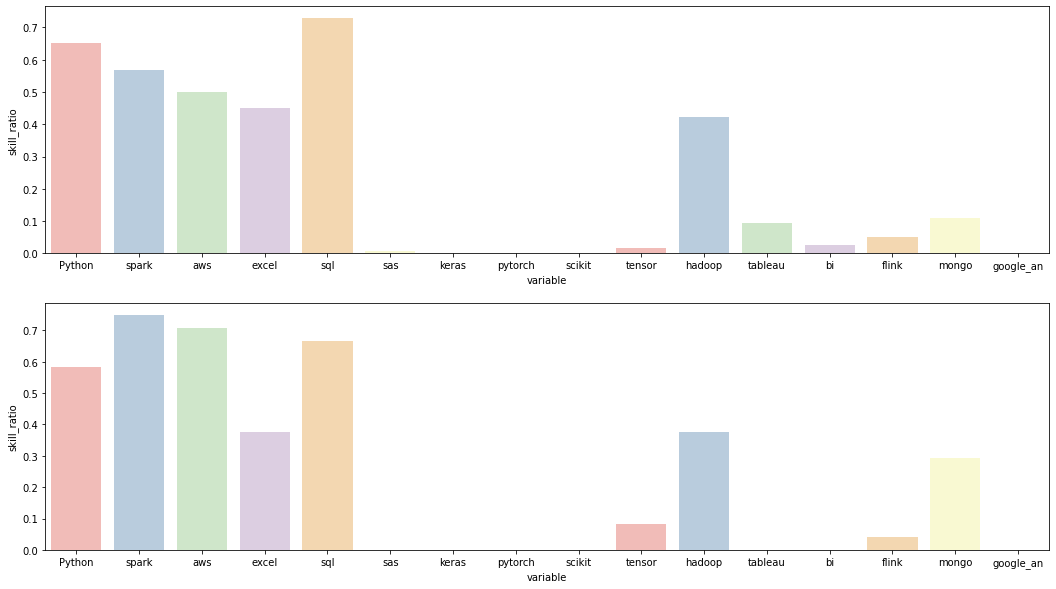

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 10)

# Data Engineer Skill
sns.barplot(x= 'variable', y= 'skill_ratio', data = Data_Engineer_Skill, estimator = np.mean, palette = 'Pastel1', ax = ax1) 
# 상위 20% Data Engineer Skill
sns.barplot(x= 'variable', y= 'skill_ratio', data = Data_Engineer_Skill_20, estimator = np.mean, palette = 'Pastel1', ax = ax2) 

* Data Engineer 보유 기술
  * 전체 : SQL, Python, Spark
  * 상위 20% : Spark, Aws, SQL, Python

### 4. Data Analyst 분석

In [ ]:
Data_Analyst = train[train['Job'] == 'Data Analyst']

In [ ]:
Data_Analyst.head()

,Job,Rating,Size,Type of ownership,Industry,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
13,Data Analyst,4.1,201 - 500,Company - Private,Advertising & Marketing,Business Services,65.5,WA,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0
27,Data Analyst,3.7,5001 - 10000,Company - Public,Insurance Carriers,Insurance,47.5,MA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
35,Data Analyst,4.2,201 - 500,Company - Private,IT Services,Information Technology,106.0,CA,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0
40,Data Analyst,4.2,201 - 500,Company - Private,IT Services,Information Technology,88.0,CA,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0
47,Data Analyst,3.1,5001 - 10000,Company - Private,Enterprise Software & Network Solutions,Information Technology,29.5,CO,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Data_Analyst_Skill = Data_Analyst.groupby('Job').mean()
Data_Analyst_Skill

,Rating,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Job,,,,,,,,,,,,,,,,,,
Data Analyst,3.63211,66.344037,0.330275,0.055046,0.091743,0.743119,0.724771,0.119266,0.0,0.0,0.0,0.0,0.027523,0.40367,0.174312,0.0,0.027523,0.100917


In [ ]:
Data_Analyst.columns

Index(['Job', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Avg Salary(K)', 'Job Location', 'Python', 'spark', 'aws', 'excel',
       'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop',
       'tableau', 'bi', 'flink', 'mongo', 'google_an'],
      dtype='object')

In [ ]:
# 행 열 변경
Data_Analyst_Skill = pd.melt(Data_Analyst_Skill, id_vars=['Rating','Avg Salary(K)'], value_vars = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 
                                                                                                       'pytorch','scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo','google_an'], value_name= 'skill_ratio')

In [ ]:
Data_Analyst_Skill = Data_Analyst_Skill.drop(['Rating','Avg Salary(K)'], axis = 1)
Data_Analyst_Skill

,variable,skill_ratio
0,Python,0.330275
1,spark,0.055046
2,aws,0.091743
3,excel,0.743119
4,sql,0.724771
5,sas,0.119266
6,keras,0.000000
7,pytorch,0.000000
8,scikit,0.000000
9,tensor,0.000000


In [ ]:
# 상위 20%의 급여 : 122.3
Data_Analyst['Avg Salary(K)'].quantile(0.80)

77.5

In [ ]:
Data_Analyst_20 = Data_Analyst[Data_Analyst['Avg Salary(K)'] > 77.5]

In [ ]:
Data_Analyst_20.head()

,Job,Rating,Size,Type of ownership,Industry,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
35,Data Analyst,4.2,201 - 500,Company - Private,IT Services,Information Technology,106.0,CA,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0
40,Data Analyst,4.2,201 - 500,Company - Private,IT Services,Information Technology,88.0,CA,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0
142,Data Analyst,4.3,51 - 200,Company - Private,Real Estate,Real Estate,103.5,CA,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
216,Data Analyst,3.1,1001 - 5000,Company - Public,Video Games,Media,92.5,CA,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
218,Data Analyst,4.3,1001 - 5000,Company - Private,Trucking,Transportation & Logistics,79.0,OH,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Data_Analyst_Skill_20 = Data_Analyst_20.groupby('Job').mean()
Data_Analyst_Skill_20

,Rating,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Job,,,,,,,,,,,,,,,,,,
Data Analyst,3.525,106.4,0.6,0.05,0.1,0.6,0.95,0.15,0.0,0.0,0.0,0.0,0.05,0.5,0.1,0.0,0.15,0.1


In [ ]:
# 행 열 변경
Data_Analyst_Skill_20 = pd.melt(Data_Analyst_Skill_20, id_vars=['Rating','Avg Salary(K)'], value_vars = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 
                                                                                                       'pytorch','scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo','google_an'], value_name= 'skill_ratio')

In [ ]:
Data_Analyst_Skill_20 = Data_Analyst_Skill_20.drop(['Rating','Avg Salary(K)'], axis = 1)
Data_Analyst_Skill_20

,variable,skill_ratio
0,Python,0.60
1,spark,0.05
2,aws,0.10
3,excel,0.60
4,sql,0.95
5,sas,0.15
6,keras,0.00
7,pytorch,0.00
8,scikit,0.00
9,tensor,0.00


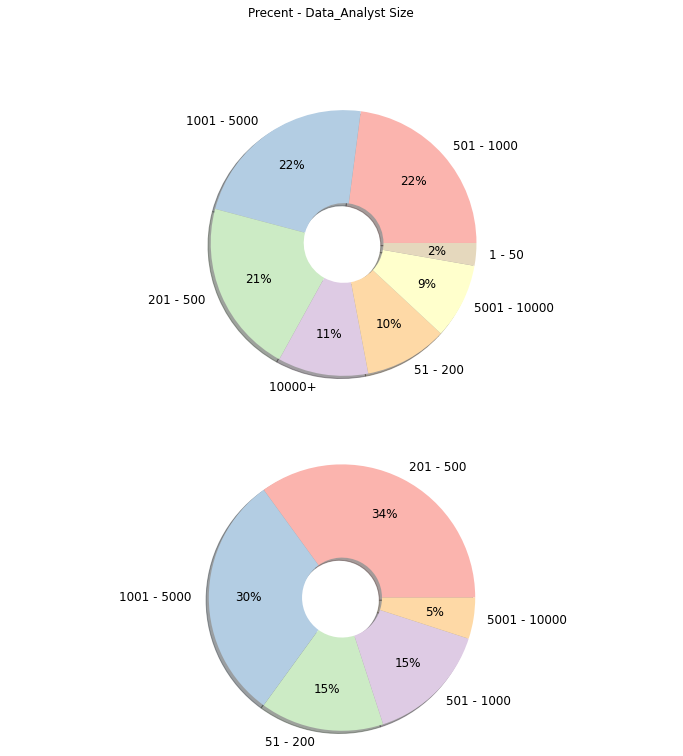

In [ ]:
# Data_Analyst 직업 회사 규모 분포 
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Analyst Size")

ax1.pie(Data_Analyst['Size'].value_counts().values,
        labels=Data_Analyst['Size'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Analyst['Size'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Analyst_20['Size'].value_counts().values,
        labels=Data_Analyst_20['Size'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Analyst_20['Size'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data Analyst 직업 회사 규모 분포 
  * 전체 : 501명 ~ 1000명, 1001명 ~ 5000명, 201명 ~ 500명
  * 상위 20% : 201명 ~ 500명, 1001 ~ 5000명, 51명 ~ 200명, 501명 ~ 1000명

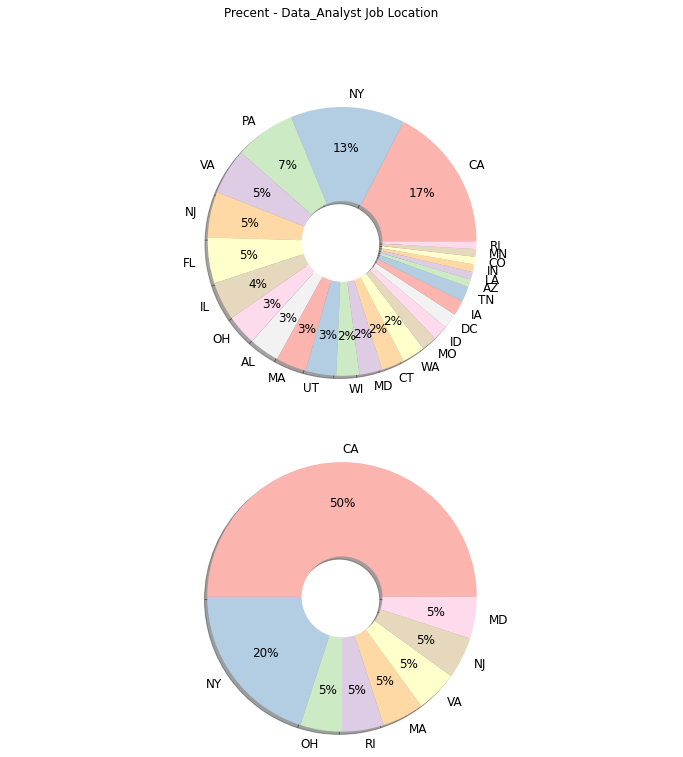

In [ ]:
# Data_Analyst 직업 지역 분포 
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Analyst Job Location")

ax1.pie(Data_Analyst['Job Location'].value_counts().values,
        labels=Data_Analyst['Job Location'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Analyst['Job Location'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Analyst_20['Job Location'].value_counts().values,
        labels=Data_Analyst_20['Job Location'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Analyst_20['Job Location'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data Analyst 직업 지역 분포
  * 전체 : CA, NY, PA
  * 상위 20% : CA, NY

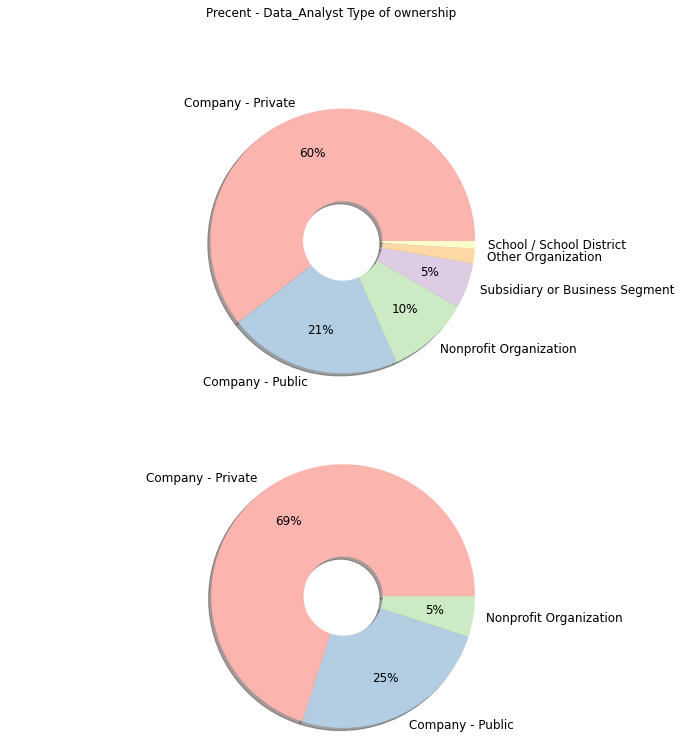

In [ ]:
# Data_Analyst 직업 기업 종류 분포
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Analyst Type of ownership")

ax1.pie(Data_Analyst['Type of ownership'].value_counts().values,
        labels=Data_Analyst['Type of ownership'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Analyst['Type of ownership'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Analyst_20['Type of ownership'].value_counts().values,
        labels=Data_Analyst_20['Type of ownership'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Analyst_20['Type of ownership'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data Analyst 직업 기업 종류 분포
  * 전체 : 사기업, 공기업, 비영리단체
  * 상위 20% : 사기업, 공기업, 비영리단체

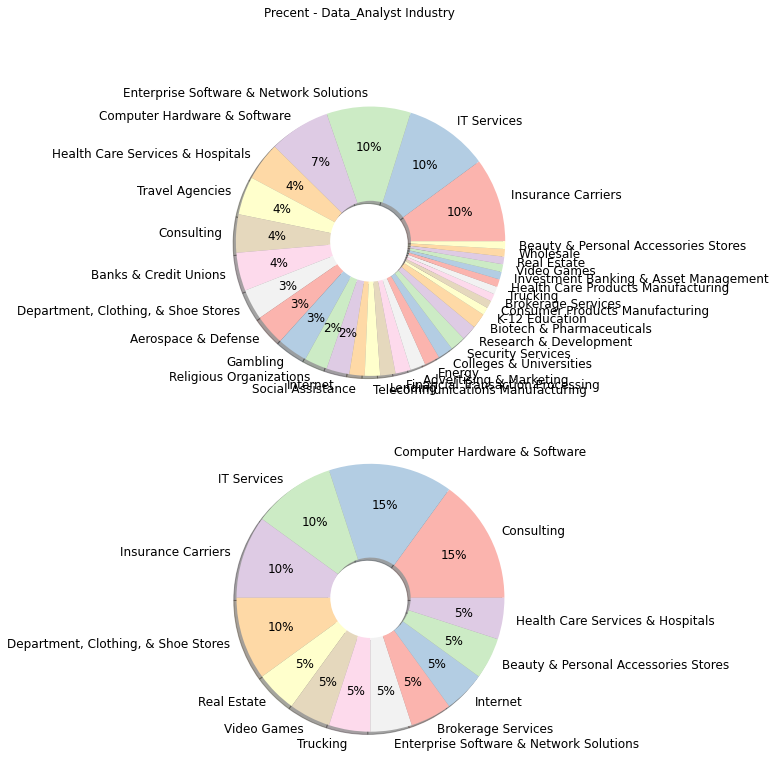

In [ ]:
# Data_Analyst 직업 회사 분야 분포
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Analyst Industry")

ax1.pie(Data_Analyst['Industry'].value_counts().values,
        labels=Data_Analyst['Industry'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Analyst['Industry'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Analyst_20['Industry'].value_counts().values,
        labels=Data_Analyst_20['Industry'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Analyst_20['Industry'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data Analyst 직업 회사 분야 분포
  * 전체 : 보험 회사, IT 서비스, 소프트웨어 - 네트워크 솔루션 기업
  * 상위 20% : 컨설팅, 컴퓨터 하드웨어 - 소프트웨어, IT 서비스, 보험 회사

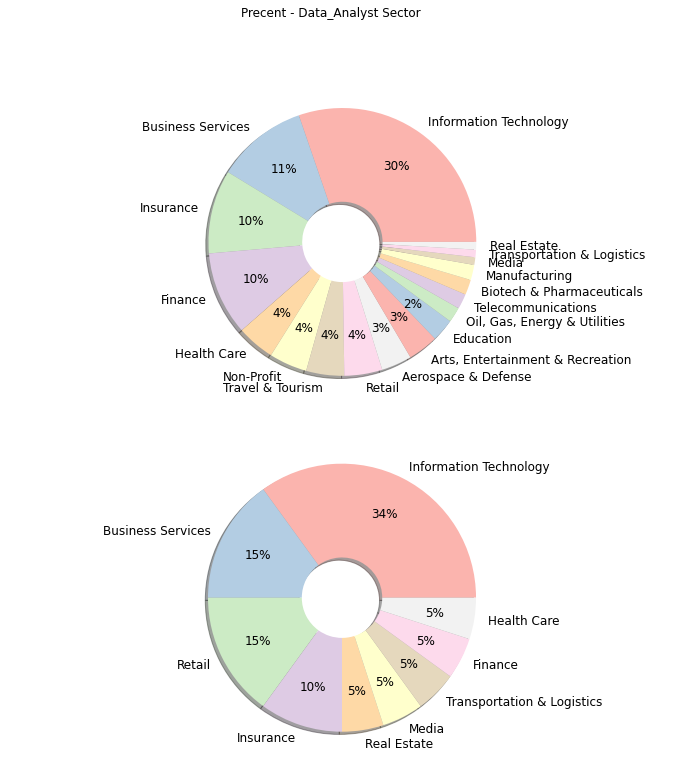

In [ ]:
# Data_Analyst 직업 산업군 분포
# 전체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(12, 12)
fig.suptitle("Precent - Data_Analyst Sector")

ax1.pie(Data_Analyst['Sector'].value_counts().values,
        labels=Data_Analyst['Sector'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Analyst['Sector'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

# 상위 20%
ax2.pie(Data_Analyst_20['Sector'].value_counts().values,
        labels=Data_Analyst_20['Sector'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Data_Analyst_20['Sector'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax2.axis('equal')
plt.show()

* Data Analyst 직업 산업군 분포
  * 전체 : 정보 기술, 비즈니스 서비스, 보험, 금융
  * 상위 20% : 정보 기술, 비즈니스 서비스, 소매업

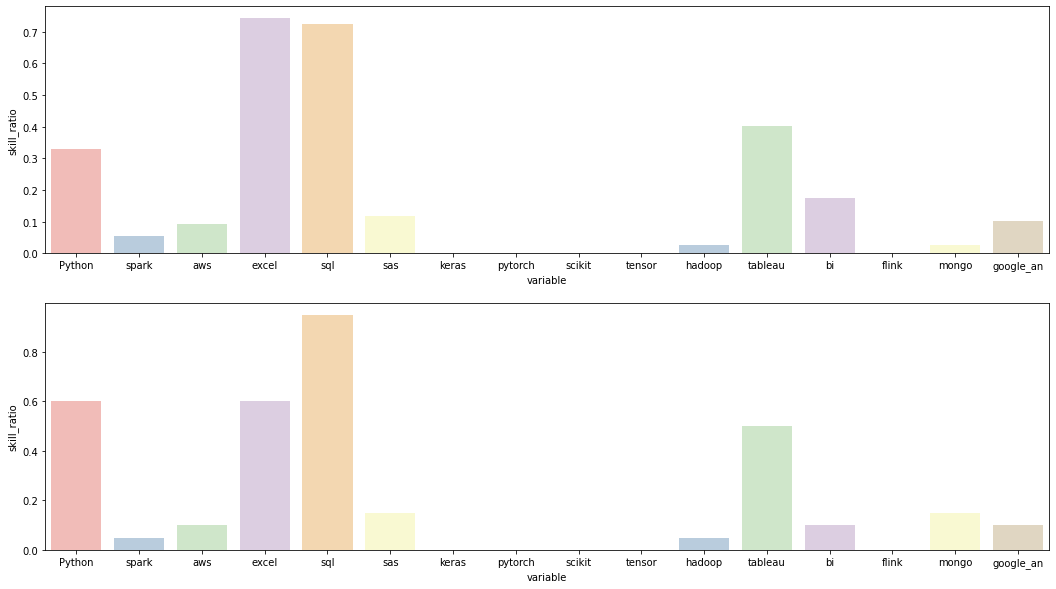

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 10)

# Data Analyst Skill
sns.barplot(x= 'variable', y= 'skill_ratio', data = Data_Analyst_Skill, estimator = np.mean, palette = 'Pastel1', ax = ax1) 
# 상위 20% Data Analyst Skill
sns.barplot(x= 'variable', y= 'skill_ratio', data = Data_Analyst_Skill_20, estimator = np.mean, palette = 'Pastel1', ax = ax2) 

* Data Analyst 보유 기술
  * 전체 : Excel, SQL, Tableau
  * 상위 20% : SQL, Excel, Python, Tableau

### 5. Rating 4점 이상의 기업

In [ ]:
train.head()

,Job,Rating,Size,Type of ownership,Industry,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,data scientist,3.8,501 - 1000,Company - Private,Aerospace & Defense,Aerospace & Defense,72.0,NM,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,data scientist,3.4,10000+,Other Organization,Health Care Services & Hospitals,Health Care,87.5,MD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,data scientist,4.8,501 - 1000,Company - Private,Security Services,Business Services,85.0,FL,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,data scientist,3.8,1001 - 5000,Government,Energy,"Oil, Gas, Energy & Utilities",76.5,WA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,data scientist,2.9,51 - 200,Company - Private,Advertising & Marketing,Business Services,114.5,NY,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 평점 4점 이상 회사 > 1, 2점 회사는 적어서 비교 X
Rating_high = train[train['Rating'] >= 4]
Rating_high.shape # 206개 회사

(206, 24)

In [ ]:
# 전체 회사 평균 연봉 
train['Avg Salary(K)'].mean()

100.8836389280677

In [ ]:
# 평점 4점 이상 회사 평균 연봉
Rating_high['Avg Salary(K)'].mean()

105.4368932038835

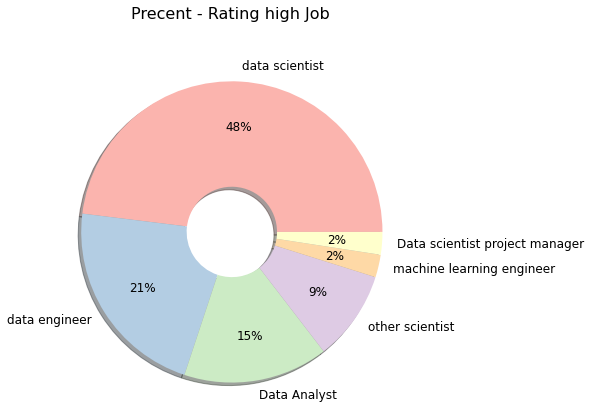

In [ ]:
# 평점 4점 이상 직업별 분포
plt.figure(figsize=(6,6))
plt.pie(Rating_high['Job'].value_counts().values,
        labels=Rating_high['Job'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Rating_high['Job'].value_counts().index)),
        shadow = True, pctdistance=0.7,
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
plt.axis('equal')
plt.title("Precent - Rating high Job", fontsize=16, pad=50)
plt.show()

* 평점 4점 이상 기업
  * 데이터 사이언티스트
  * 데이터 엔지니어
  * 데이터 분석가
    > 분석 데이터 표본이 같지 않음

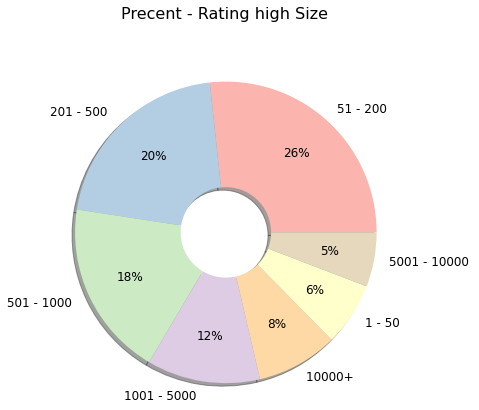

In [ ]:
# 평점 4점 이상 회사 규모 분포
plt.figure(figsize=(6,6))
plt.pie(Rating_high['Size'].value_counts().values,
        labels=Rating_high['Size'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Rating_high['Size'].value_counts().index)),
        shadow = True, pctdistance=0.7,
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
plt.axis('equal')
plt.title("Precent - Rating high Size", fontsize=16, pad=50)
plt.show()

* 평점 4점 이상 회사 규모 분포
  * 51명 ~ 200명
  * 201명 ~ 500명
  * 501명 ~ 1000명

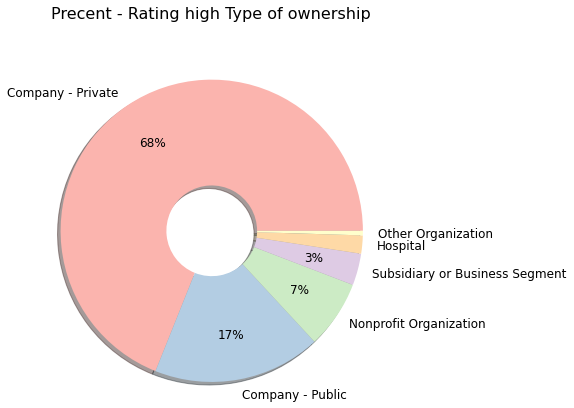

In [ ]:
# 평점 4점 이상 기업 종류 분포
plt.figure(figsize=(6,6))
plt.pie(Rating_high['Type of ownership'].value_counts().values,
        labels=Rating_high['Type of ownership'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Rating_high['Type of ownership'].value_counts().index)),
        shadow = True, pctdistance=0.7,
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
plt.axis('equal')
plt.title("Precent - Rating high Type of ownership", fontsize=16, pad=50)
plt.show()

* 평점 4점 이상 기업 종류 분포
  * 사기업
  * 공기업
  * 비영리단체

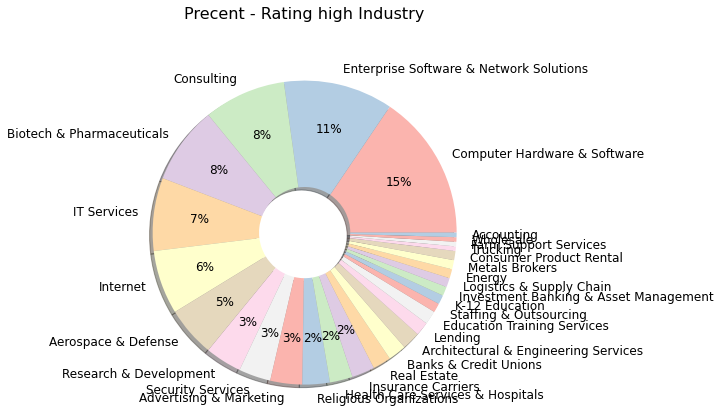

In [ ]:
# 평점 4점 이상 회사 분야 분포
plt.figure(figsize=(6,6))
plt.pie(Rating_high['Industry'].value_counts().values,
        labels=Rating_high['Industry'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Rating_high['Industry'].value_counts().index)),
        shadow = True, pctdistance=0.7,
        wedgeprops = {'width': 0.7}, 
        textprops= {'fontsize':12}) 
plt.axis('equal')
plt.title("Precent - Rating high Industry", fontsize=16, pad=50)
plt.show()

* 평점 4점 이상 회사 분야 분포
  * 컴퓨터 하드웨어 - 소프트웨어
  * 소프트웨어 - 네트워크 솔루션 기업
  * 컨설팅
  * 제약 - 바이오 

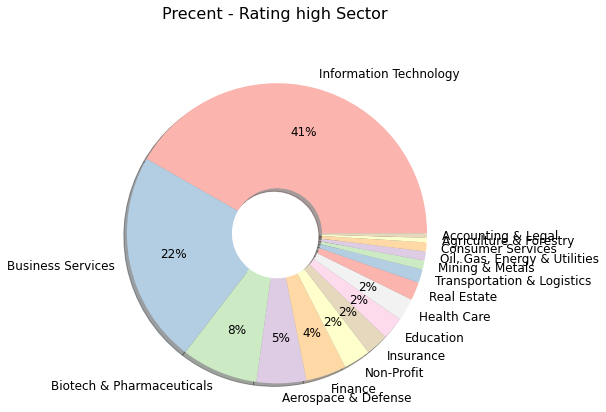

In [ ]:
# 평점 4점 이상 산업군 분포
plt.figure(figsize=(6,6))
plt.pie(Rating_high['Sector'].value_counts().values,
        labels=Rating_high['Sector'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Rating_high['Sector'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
plt.axis('equal')
plt.title("Precent - Rating high Sector", fontsize=16, pad=50)
plt.show()

* 평점 4점 이상 산업군 분포
  * 정보 기술
  * 비즈니스 서비스
  * 제약 - 바이오

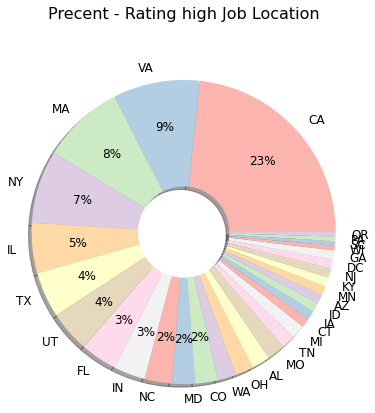

In [ ]:
# 평점 4점 이상 지역 분포
plt.figure(figsize=(6,6))
plt.pie(Rating_high['Job Location'].value_counts().values,
        labels=Rating_high['Job Location'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(Rating_high['Job Location'].value_counts().index)),
        shadow = True, pctdistance=0.7,
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
plt.axis('equal')
plt.title("Precent - Rating high Job Location", fontsize=16, pad=50)
plt.show()

* 평점 4점 이상 지역 분포
  * CA
  * VA
  * MA
  * NY

### 6. 전체 직무 분석(Job)

In [ ]:
train.head() 

,Job,Rating,Size,Type of ownership,Industry,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,data scientist,3.8,501 - 1000,Company - Private,Aerospace & Defense,Aerospace & Defense,72.0,NM,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,data scientist,3.4,10000+,Other Organization,Health Care Services & Hospitals,Health Care,87.5,MD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,data scientist,4.8,501 - 1000,Company - Private,Security Services,Business Services,85.0,FL,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,data scientist,3.8,1001 - 5000,Government,Energy,"Oil, Gas, Energy & Utilities",76.5,WA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,data scientist,2.9,51 - 200,Company - Private,Advertising & Marketing,Business Services,114.5,NY,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


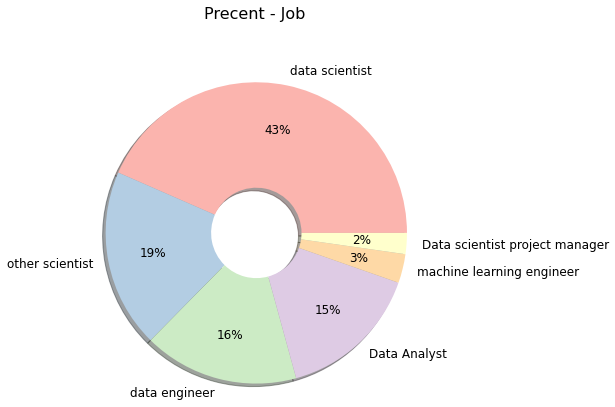

In [ ]:
# 전체 직업별 분포
plt.figure(figsize=(6,6))
plt.pie(train['Job'].value_counts().values,
        labels=train['Job'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(train['Job'].value_counts().index)),
        shadow = True, pctdistance=0.7,
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
plt.axis('equal')
plt.title("Precent - Job", fontsize=16, pad=50)
plt.show()

* 전체 직업별 분포
  * Data Scientist
  * Other Scientist
  * Data Engineer


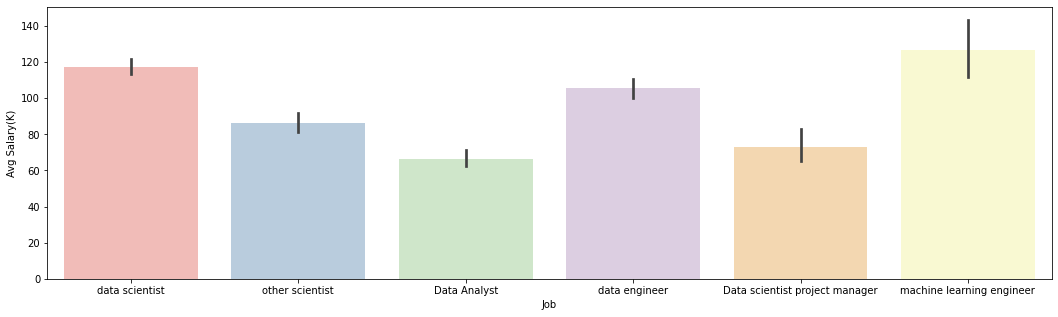

In [ ]:
# 직업별 급여
plt.figure(figsize = (18,5))
sns.barplot(x= 'Job', y= 'Avg Salary(K)', data = train, estimator = np.mean, palette = 'Pastel1') 

* 직업별 급여
  * Machine Learning Engineer
  * Data Scientist
  * Data Engineer
  

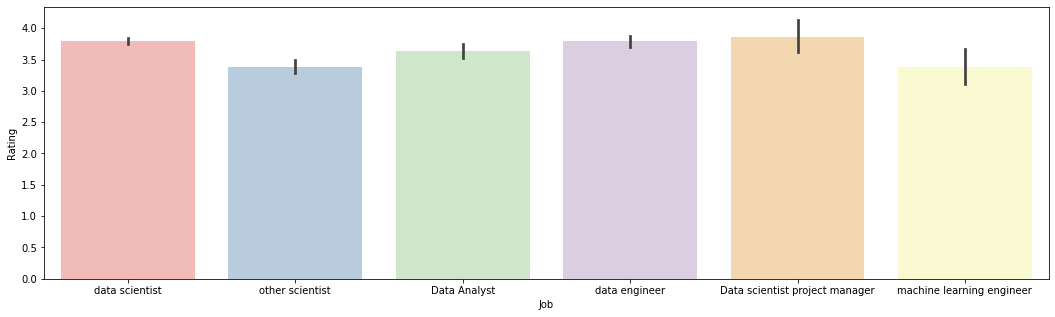

In [ ]:
# 직업별 평점
plt.figure(figsize = (18,5))
sns.barplot(x= 'Job', y= 'Rating', data = train, estimator = np.mean, palette = 'Pastel1') 

In [ ]:
Job_Rating = train.groupby('Job').mean()['Rating'].sort_values(ascending = False)
Job_Rating

Job
Data scientist project manager    3.862500
data engineer                     3.789831
data scientist                    3.788961
Data Analyst                      3.632110
machine learning engineer         3.386364
other scientist                   3.385294
Name: Rating, dtype: float64

* 직업별 평점
  * Data scientist project manager
  * data engineer
  * data scientist

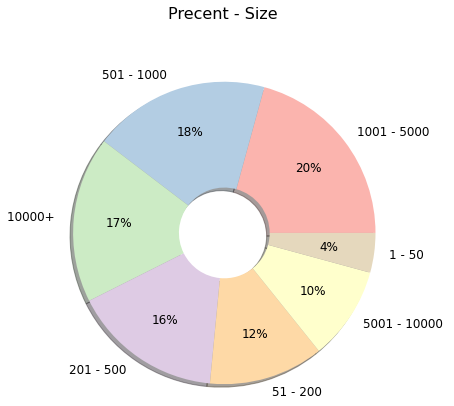

In [ ]:
# 전체 직업 회사 규모 분포
plt.figure(figsize=(6,6))
plt.pie(train['Size'].value_counts().values,
        labels=train['Size'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(train['Size'].value_counts().index)),
        shadow = True, pctdistance=0.7,
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
plt.axis('equal')
plt.title("Precent - Size", fontsize=16, pad=50)
plt.show()

* 전체 직업 회사 규모 분포
  * 1001명 ~ 5000명
  * 501명 ~ 1000명
  * 10000명 이상

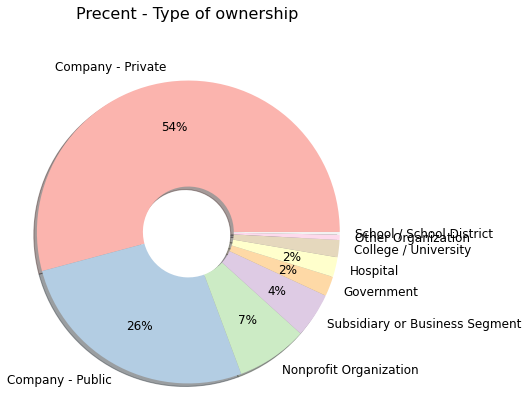

In [ ]:
# 전체 직업 기업 종류 분포
plt.figure(figsize=(6,6))
plt.pie(train['Type of ownership'].value_counts().values,
        labels=train['Type of ownership'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(train['Type of ownership'].value_counts().index)),
        shadow = True, pctdistance=0.7,
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
plt.axis('equal')
plt.title("Precent - Type of ownership", fontsize=16, pad=50)
plt.show()

* 전체 직업 기업 종류 분포
  * 사기업
  * 공기업
  * 비영리단체

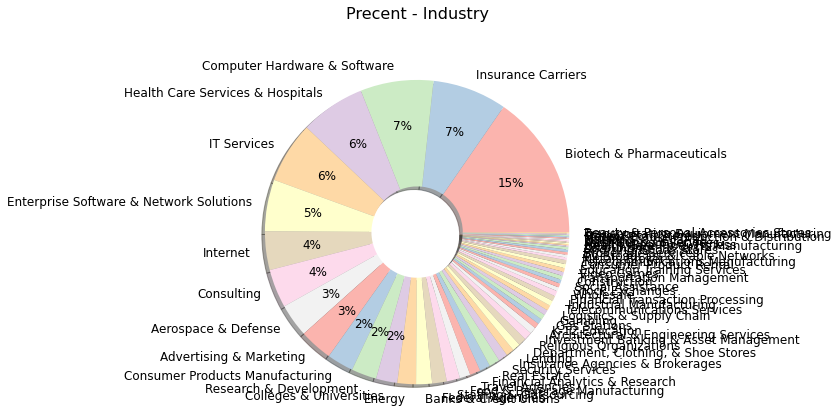

In [ ]:
# 전체 직업 회사 분야 분포
plt.figure(figsize=(6,6))
plt.pie(train['Industry'].value_counts().values,
        labels=train['Industry'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(train['Industry'].value_counts().index)),
        shadow = True, pctdistance=0.7,
        wedgeprops = {'width': 0.7}, 
        textprops= {'fontsize':12}) 
plt.axis('equal')
plt.title("Precent - Industry", fontsize=16, pad=50)
plt.show()

* 전체 직업 회사 분야 분포
  * 제약 - 바이오
  * 보험 회사
  * 컴퓨터 하드웨어 - 소프트웨어

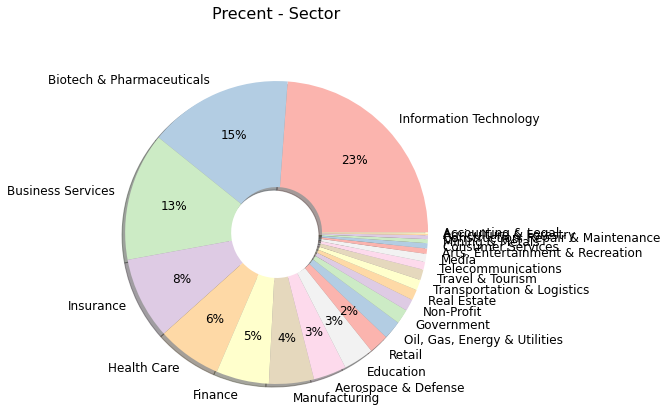

In [ ]:
# 전체 직업 산업군 분포
plt.figure(figsize=(6,6))
plt.pie(train['Sector'].value_counts().values,
        labels=train['Sector'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(train['Sector'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
plt.axis('equal')
plt.title("Precent - Sector", fontsize=16, pad=50)
plt.show()

* 전체 직업 산업군 분포
  * 정보 기술
  * 바이오 - 제약
  * 비즈니스 서비스

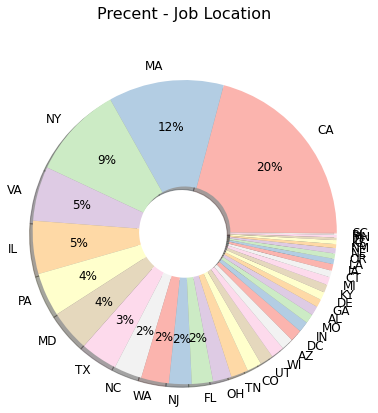

In [ ]:
# 전체 직업 지역 분포
plt.figure(figsize=(6,6))
plt.pie(train['Job Location'].value_counts().values,
        labels=train['Job Location'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(train['Job Location'].value_counts().index)),
        shadow = True, pctdistance=0.7,
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
plt.axis('equal')
plt.title("Precent - Job Location", fontsize=16, pad=50)
plt.show()

* 전체 직업 지역 분포
  * CA
  * MA
  * NY

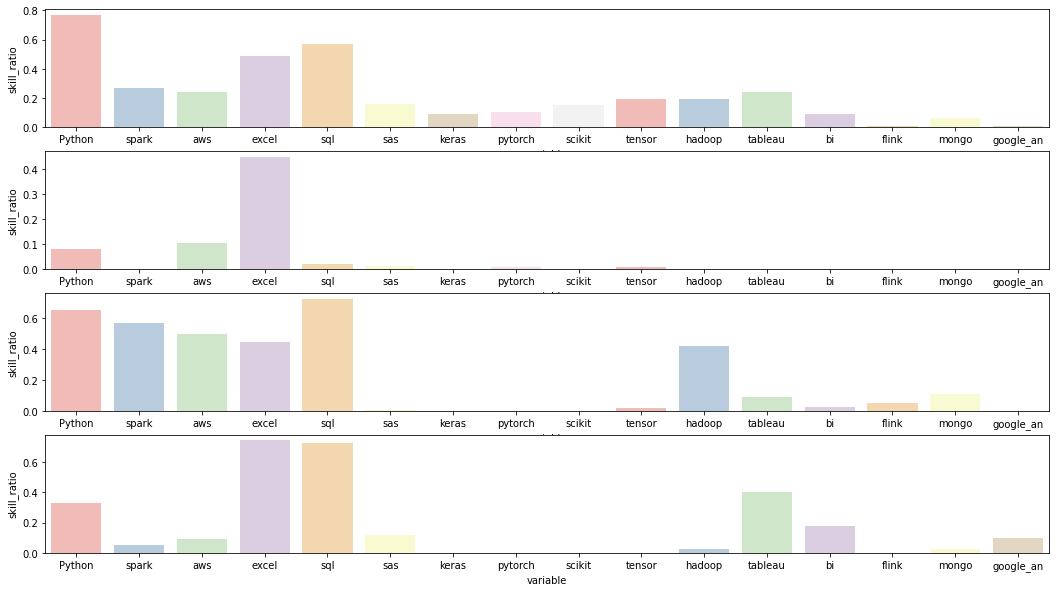

In [ ]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)
figure.set_size_inches(18, 10)

# Data scientist Skill
sns.barplot(x= 'variable', y= 'skill_ratio', data = Data_Scientist_Skill, estimator = np.mean, palette = 'Pastel1', ax = ax1) 
# Other Scientist Skill
sns.barplot(x= 'variable', y= 'skill_ratio', data = Other_Scientist_Skill, estimator = np.mean, palette = 'Pastel1', ax = ax2) 
# Data Engineer Skill
sns.barplot(x= 'variable', y= 'skill_ratio', data = Data_Engineer_Skill, estimator = np.mean, palette = 'Pastel1', ax = ax3) 
# Data Analyst Skill
sns.barplot(x= 'variable', y= 'skill_ratio', data = Data_Analyst_Skill, estimator = np.mean, palette = 'Pastel1', ax = ax4) 

*  보유 기술
  * Data Scientist : Python, SQL, Excel
  * Other Scientist : Excel, Aws, Python
  * Data Engineer : SQL, Python, Spark 
  * Data Analyst : SQL, Excel, Tableau

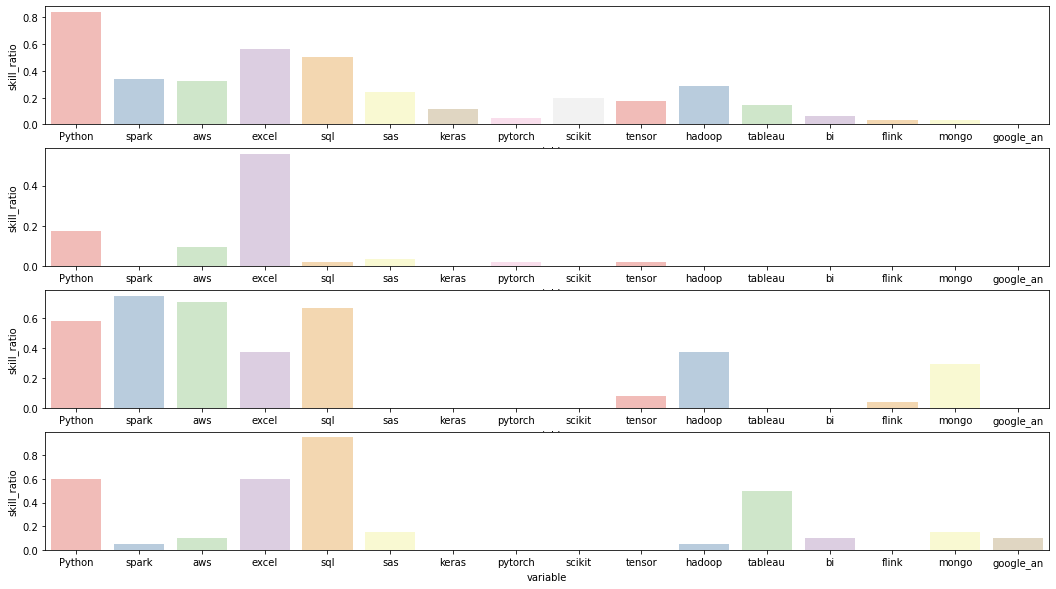

In [ ]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)
figure.set_size_inches(18, 10)

# 상위 20% Data scientist Skill 
sns.barplot(x= 'variable', y= 'skill_ratio', data = Data_Scientist_Skill_20, estimator = np.mean, palette = 'Pastel1', ax = ax1) 
# 상위 20% Other Scientist Skill
sns.barplot(x= 'variable', y= 'skill_ratio', data = Other_Scientist_Skill_20, estimator = np.mean, palette = 'Pastel1', ax = ax2) 
# 상위 20% Data Engineer Skill
sns.barplot(x= 'variable', y= 'skill_ratio', data = Data_Engineer_Skill_20, estimator = np.mean, palette = 'Pastel1', ax = ax3) 
# 상위 20% Data Analyst Skill
sns.barplot(x= 'variable', y= 'skill_ratio', data = Data_Analyst_Skill_20, estimator = np.mean, palette = 'Pastel1', ax = ax4) 

* 상위 20% 보유 기술
  * Data Scientist : Python, Excel, SQL
  * Other Scientist : Excel, Python, Aws
  * Data Engineer : Spark, Aws, SQL 
  * Data Analyst : SQL, Excel, Python, Tableau